## Decision Trees and Ensemble Models

This project uses Decision Trees and Ensemble Models in classification and regression problems.

### Process
- Understand how to use decision trees on a Dataset to make a prediction- 
Learning hyper-parameters tuning for decision trees by using RandomGrid- 
Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

For the first part of the project, I used a Classification Tree to predicte if a user has a default payment option active or not in their credit card. The data set used was obteined from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

In [1]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(columns='ID', inplace=True)

In [3]:
dataset.head(10)

0  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   
5      50000    1          2         1   57     -1      0     -1      0   
6      50000    1          1         2   37      0      0      0      0   
7     500000    1          1         2   29      0      0      0      0   
8     100000    2          2         2   23      0     -1     -1      0   
9     140000    2          3         1   28      0      0      2      0   

0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -2  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   
5      0  ...      20940      19146      19131      2000     36681     10000   
6      0  ...      19394      19619      20024      2500      1815       657   
7      0  ...     542653     483003     473944     55000     40000     38000   
8      0  ...        221       -159        567       380       601         0   
9      0  ...      12211      11793       3719      3329         0       432   

0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  
5      9000       689       679                           0  
6      1000      1000       800                           0  
7     20239     13750     13770                           0  
8       581      1687      1542                           0  
9      1000      1000      1000                           0  

[10 rows x 24 columns]

### Pre-processing of the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30001 non-null  object
 1   SEX                         30001 non-null  object
 2   EDUCATION                   30001 non-null  object
 3   MARRIAGE                    30001 non-null  object
 4   AGE                         30001 non-null  object
 5   PAY_0                       30001 non-null  object
 6   PAY_2                       30001 non-null  object
 7   PAY_3                       30001 non-null  object
 8   PAY_4                       30001 non-null  object
 9   PAY_5                       30001 non-null  object
 10  PAY_6                       30001 non-null  object
 11  BILL_AMT1                   30001 non-null  object
 12  BILL_AMT2                   30001 non-null  object
 13  BILL_AMT3                   30001 non-null  ob

From the first look into our data set we need to:
- Remove the first row of the dataframe since it contains the names of the columns
- Change the type of the variables from object to int

Moreover, as we observed in the Exploratory Analysis made in the first assignment of this course, we need some pre processing of the data before applying our model:
- ID column = id col
- Change name of target variable and PAY_0
- Correct values in variables EDUCATION and MARRIAGE.
    


In [5]:
dataset.drop(0,inplace=True)
dataset = dataset.astype('int')
dataset.rename(columns = {'default payment next month':'DEFAULT_PAYMENT', 'PAY_0':'PAY_1'}, inplace = True)
dataset['EDUCATION'] = dataset['EDUCATION'].apply(lambda x: 4 if x>4 or x<1 else x)
dataset['MARRIAGE'] = dataset['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

In [6]:
dataset.head()

0  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   
5      50000    1          2         1   57     -1      0     -1      0   

0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
1     -2  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   
5      0  ...      20940      19146      19131      2000     36681     10000   

0  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT_PAYMENT  
1         0         0         0                1  
2      1000         0      2000                1  
3      1000      1000      5000                0  
4      1100      1069      1000                0  
5      9000       689       679                0  

[5 rows x 24 columns]

- From the description of the dataset, we also know that we have some categorical varibles. That means we need to transform them using dummy variables so sklearn will be able to understand them.

In [7]:
categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [8]:
dataset = pd.get_dummies(dataset, columns=categorical_vars)
dataset.drop(columns=['SEX_2'], inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 87 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int32
 1   AGE              30000 non-null  int32
 2   BILL_AMT1        30000 non-null  int32
 3   BILL_AMT2        30000 non-null  int32
 4   BILL_AMT3        30000 non-null  int32
 5   BILL_AMT4        30000 non-null  int32
 6   BILL_AMT5        30000 non-null  int32
 7   BILL_AMT6        30000 non-null  int32
 8   PAY_AMT1         30000 non-null  int32
 9   PAY_AMT2         30000 non-null  int32
 10  PAY_AMT3         30000 non-null  int32
 11  PAY_AMT4         30000 non-null  int32
 12  PAY_AMT5         30000 non-null  int32
 13  PAY_AMT6         30000 non-null  int32
 14  DEFAULT_PAYMENT  30000 non-null  int32
 15  SEX_1            30000 non-null  uint8
 16  EDUCATION_1      30000 non-null  uint8
 17  EDUCATION_2      30000 non-null  uint8
 18  EDUCAT



#### Building a classifier by using a decision tree and calculating the confusion matrix.

In [10]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(40,20))
    _ = plot_tree(dt_classifier,feature_names=X.columns,class_names=['No Default', "Default"],filled=True,fontsize=12)

In [12]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
X = dataset[dataset.columns.difference(['DEFAULT_PAYMENT'])]
y = dataset['DEFAULT_PAYMENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

No Hyperparameter

In [14]:
tree_clf = DecisionTreeClassifier(random_state=123)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

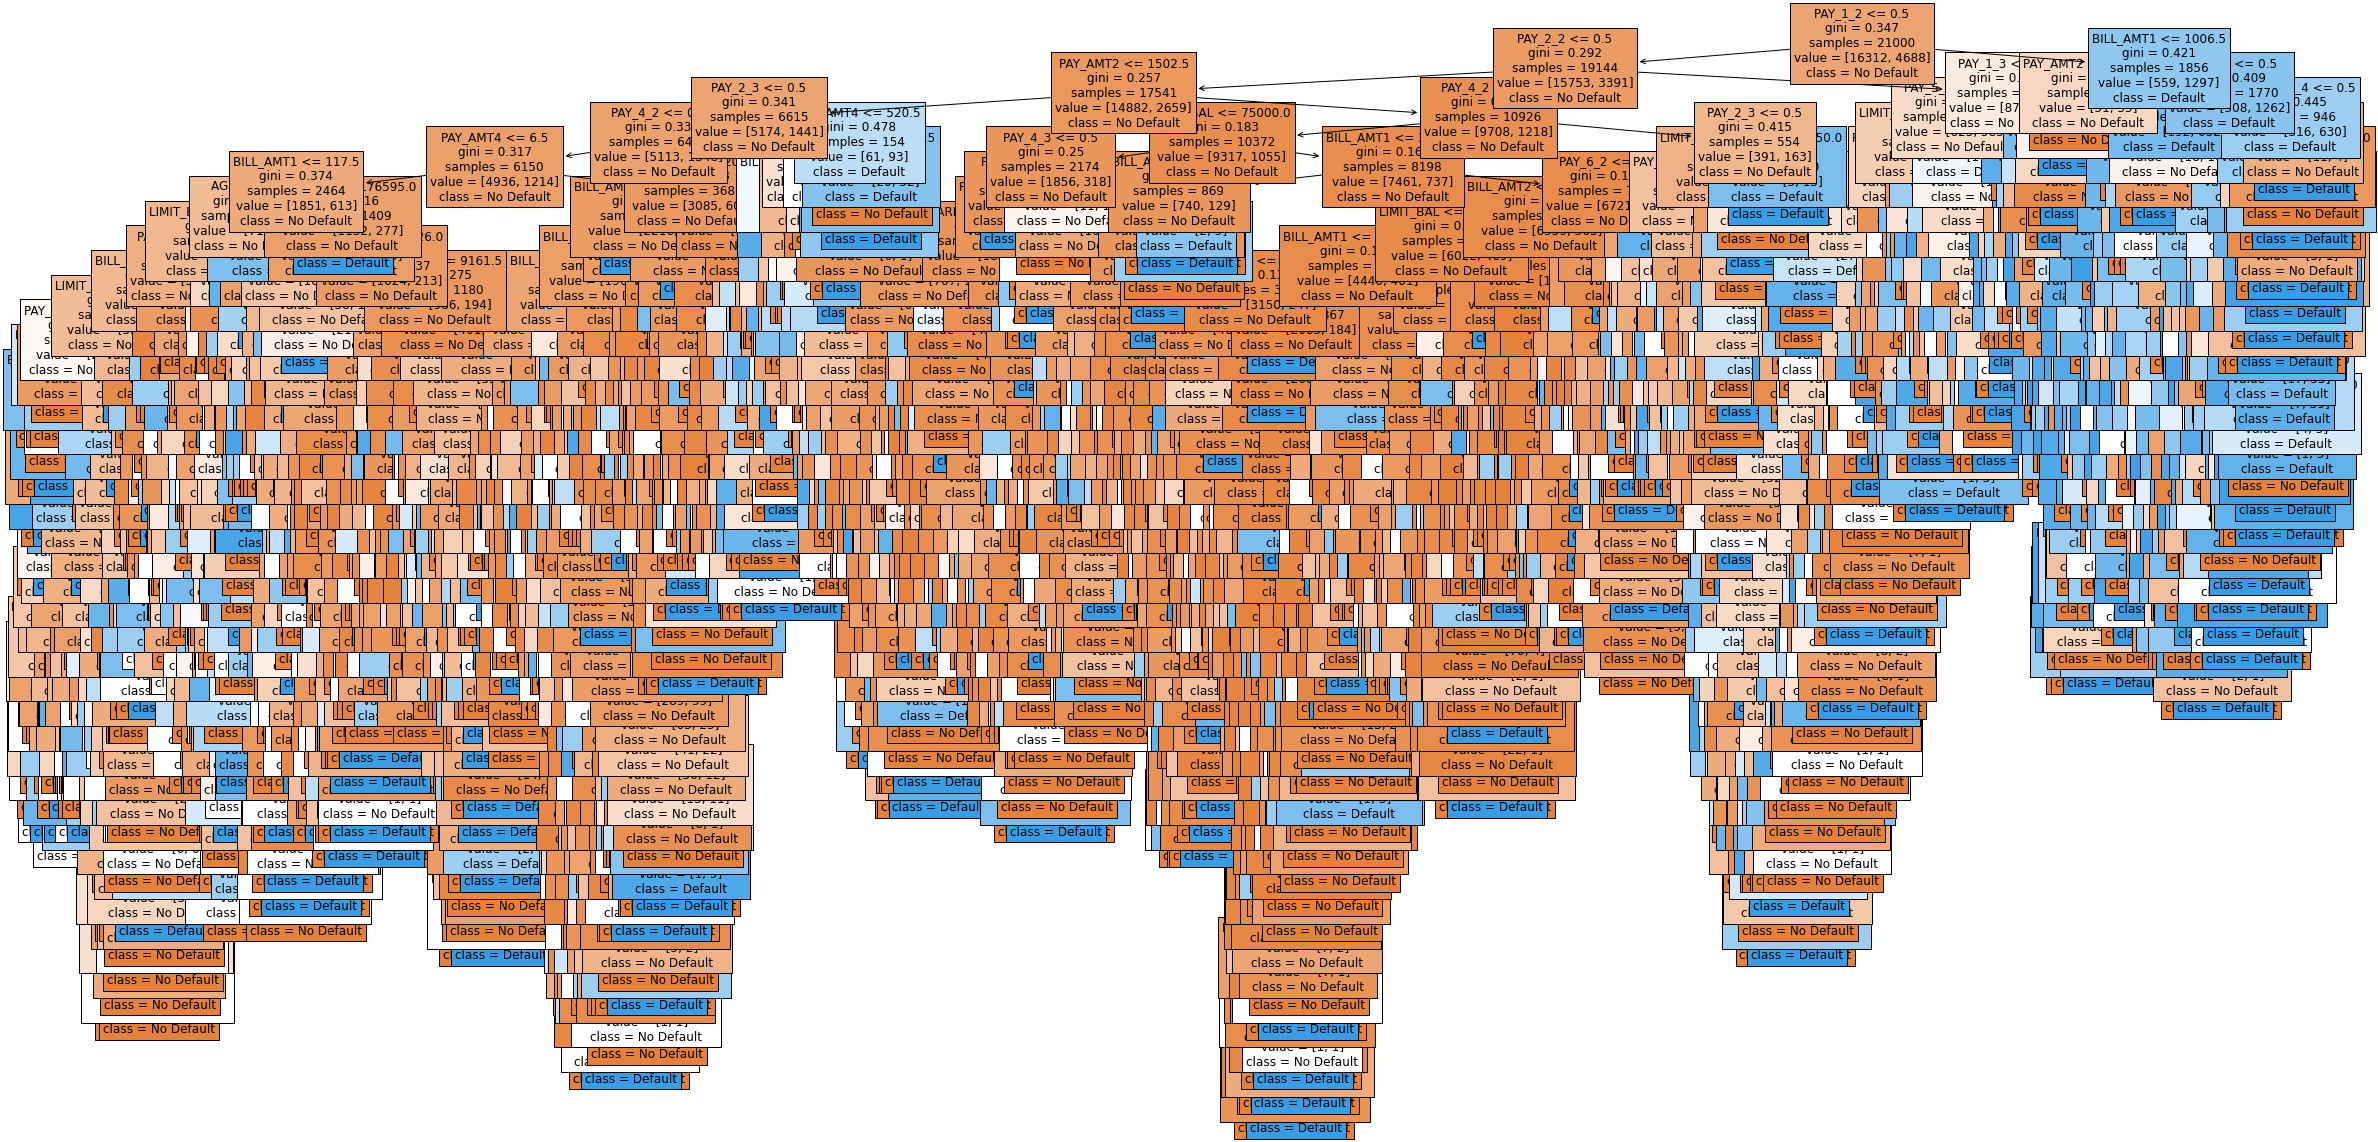

In [15]:
get_dt_graph(tree_clf)

In [16]:
y_test_pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7238888888888889


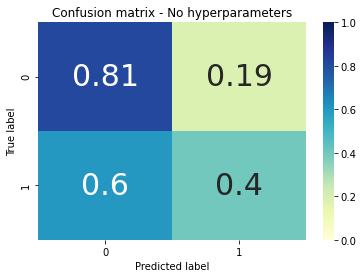

In [17]:
cm_tree = confusion_matrix(y_test, y_test_pred)
cm_norm_tree = cm_tree / cm_tree.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_tree, classes = tree_clf.classes_, title='Confusion matrix - No hyperparameters')

Tuning hyperparameter: Max_depth

In [18]:
tree_clf1 = DecisionTreeClassifier(random_state=123,max_depth=5)
tree_clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

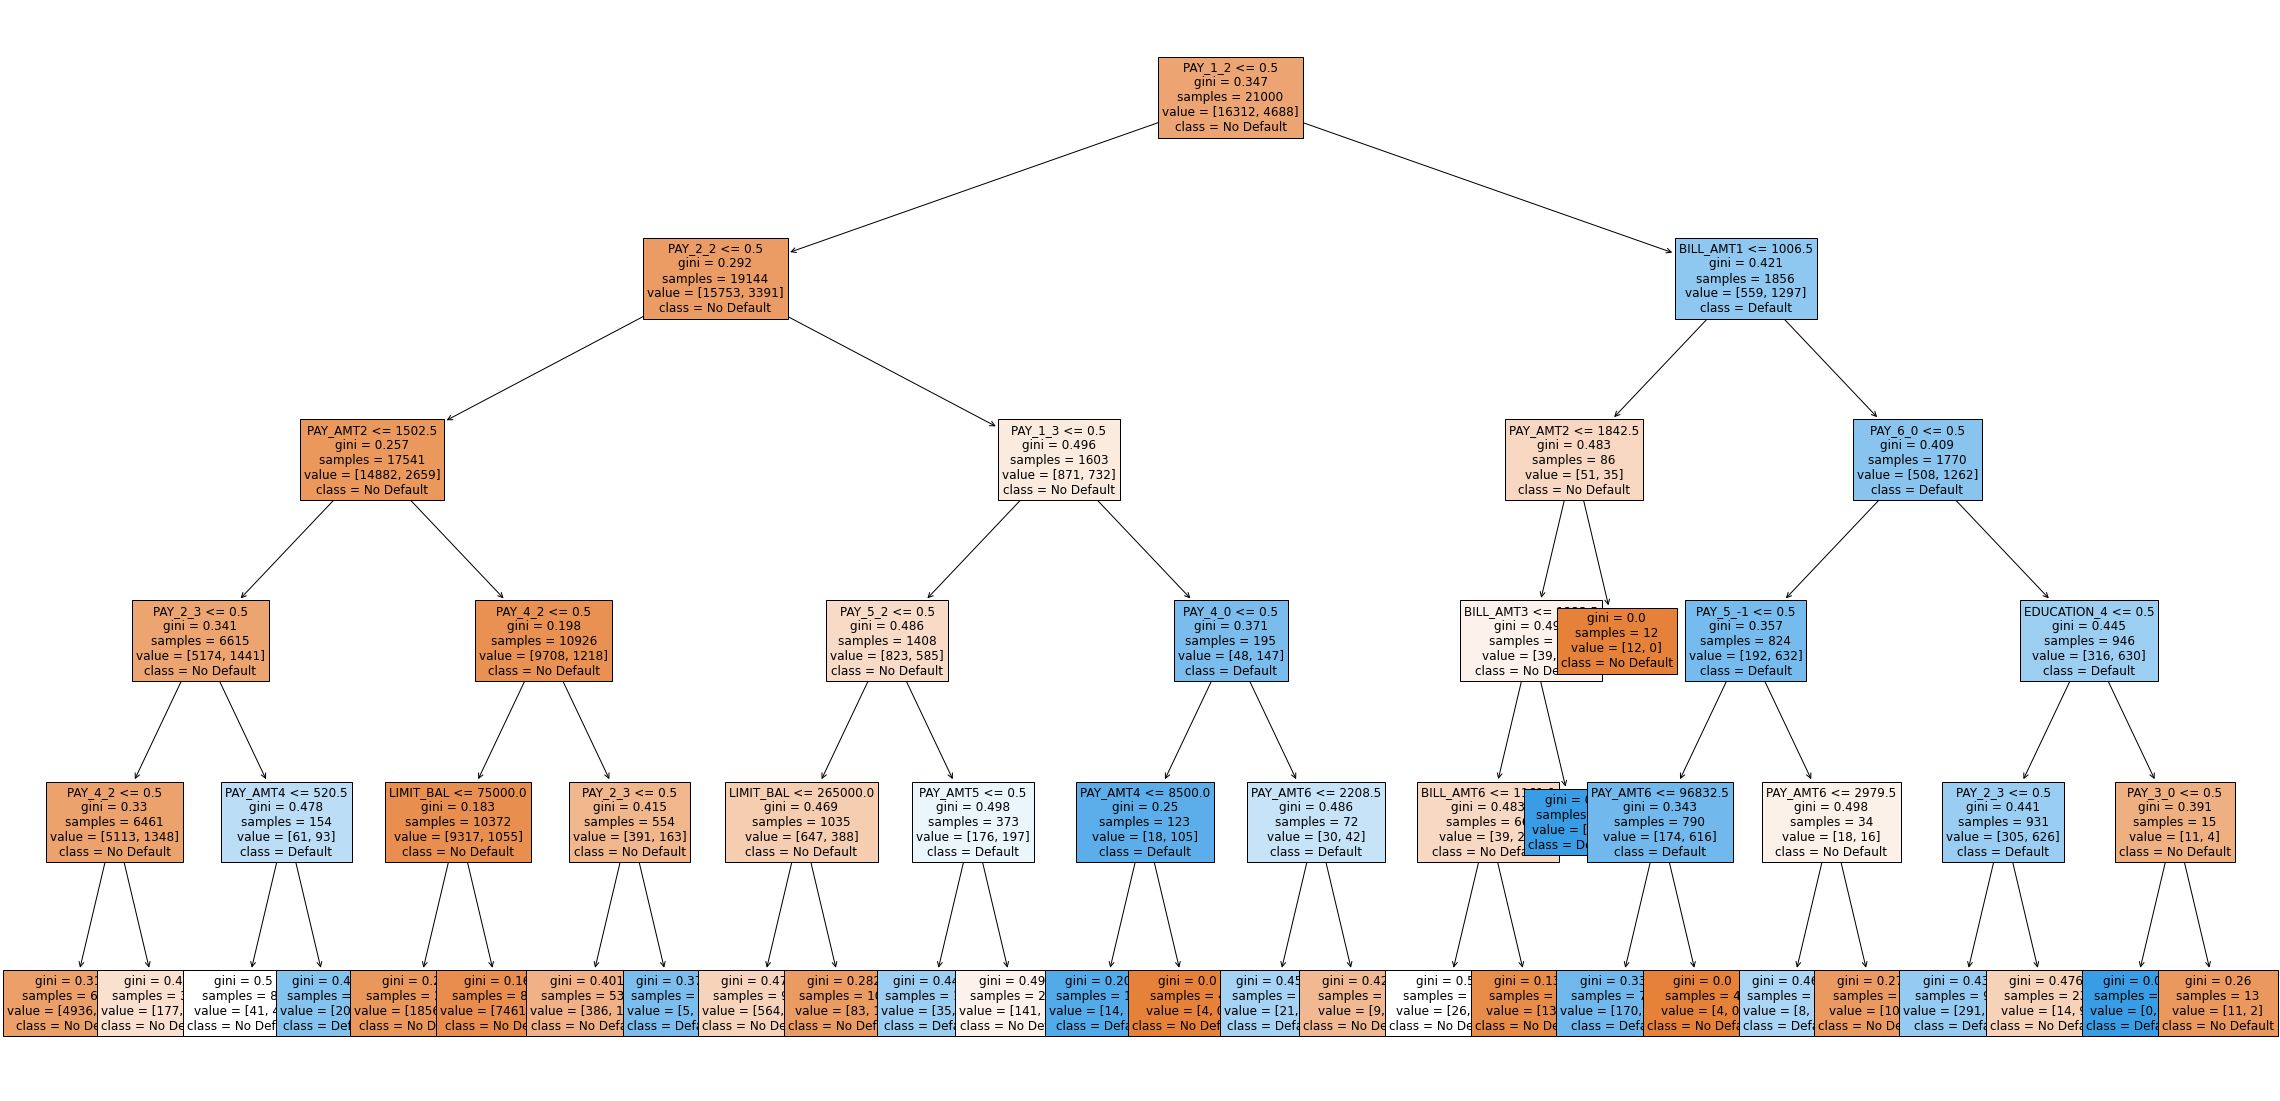

In [19]:
get_dt_graph(tree_clf1)

In [20]:
y_test_pred = tree_clf1.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8207777777777778


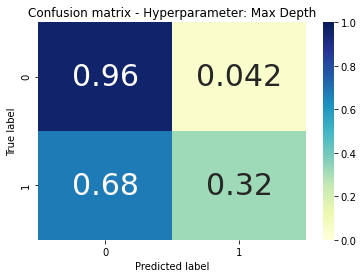

In [21]:
cm_tree = confusion_matrix(y_test, tree_clf1.predict(X_test))
cm_norm_tree = cm_tree / cm_tree.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_tree, classes = tree_clf1.classes_, title='Confusion matrix - Hyperparameter: Max Depth')

Tunning Hyperparameter: Criterion: Entropy

In [22]:
tree_clf2 = DecisionTreeClassifier(random_state=123,criterion='entropy')
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

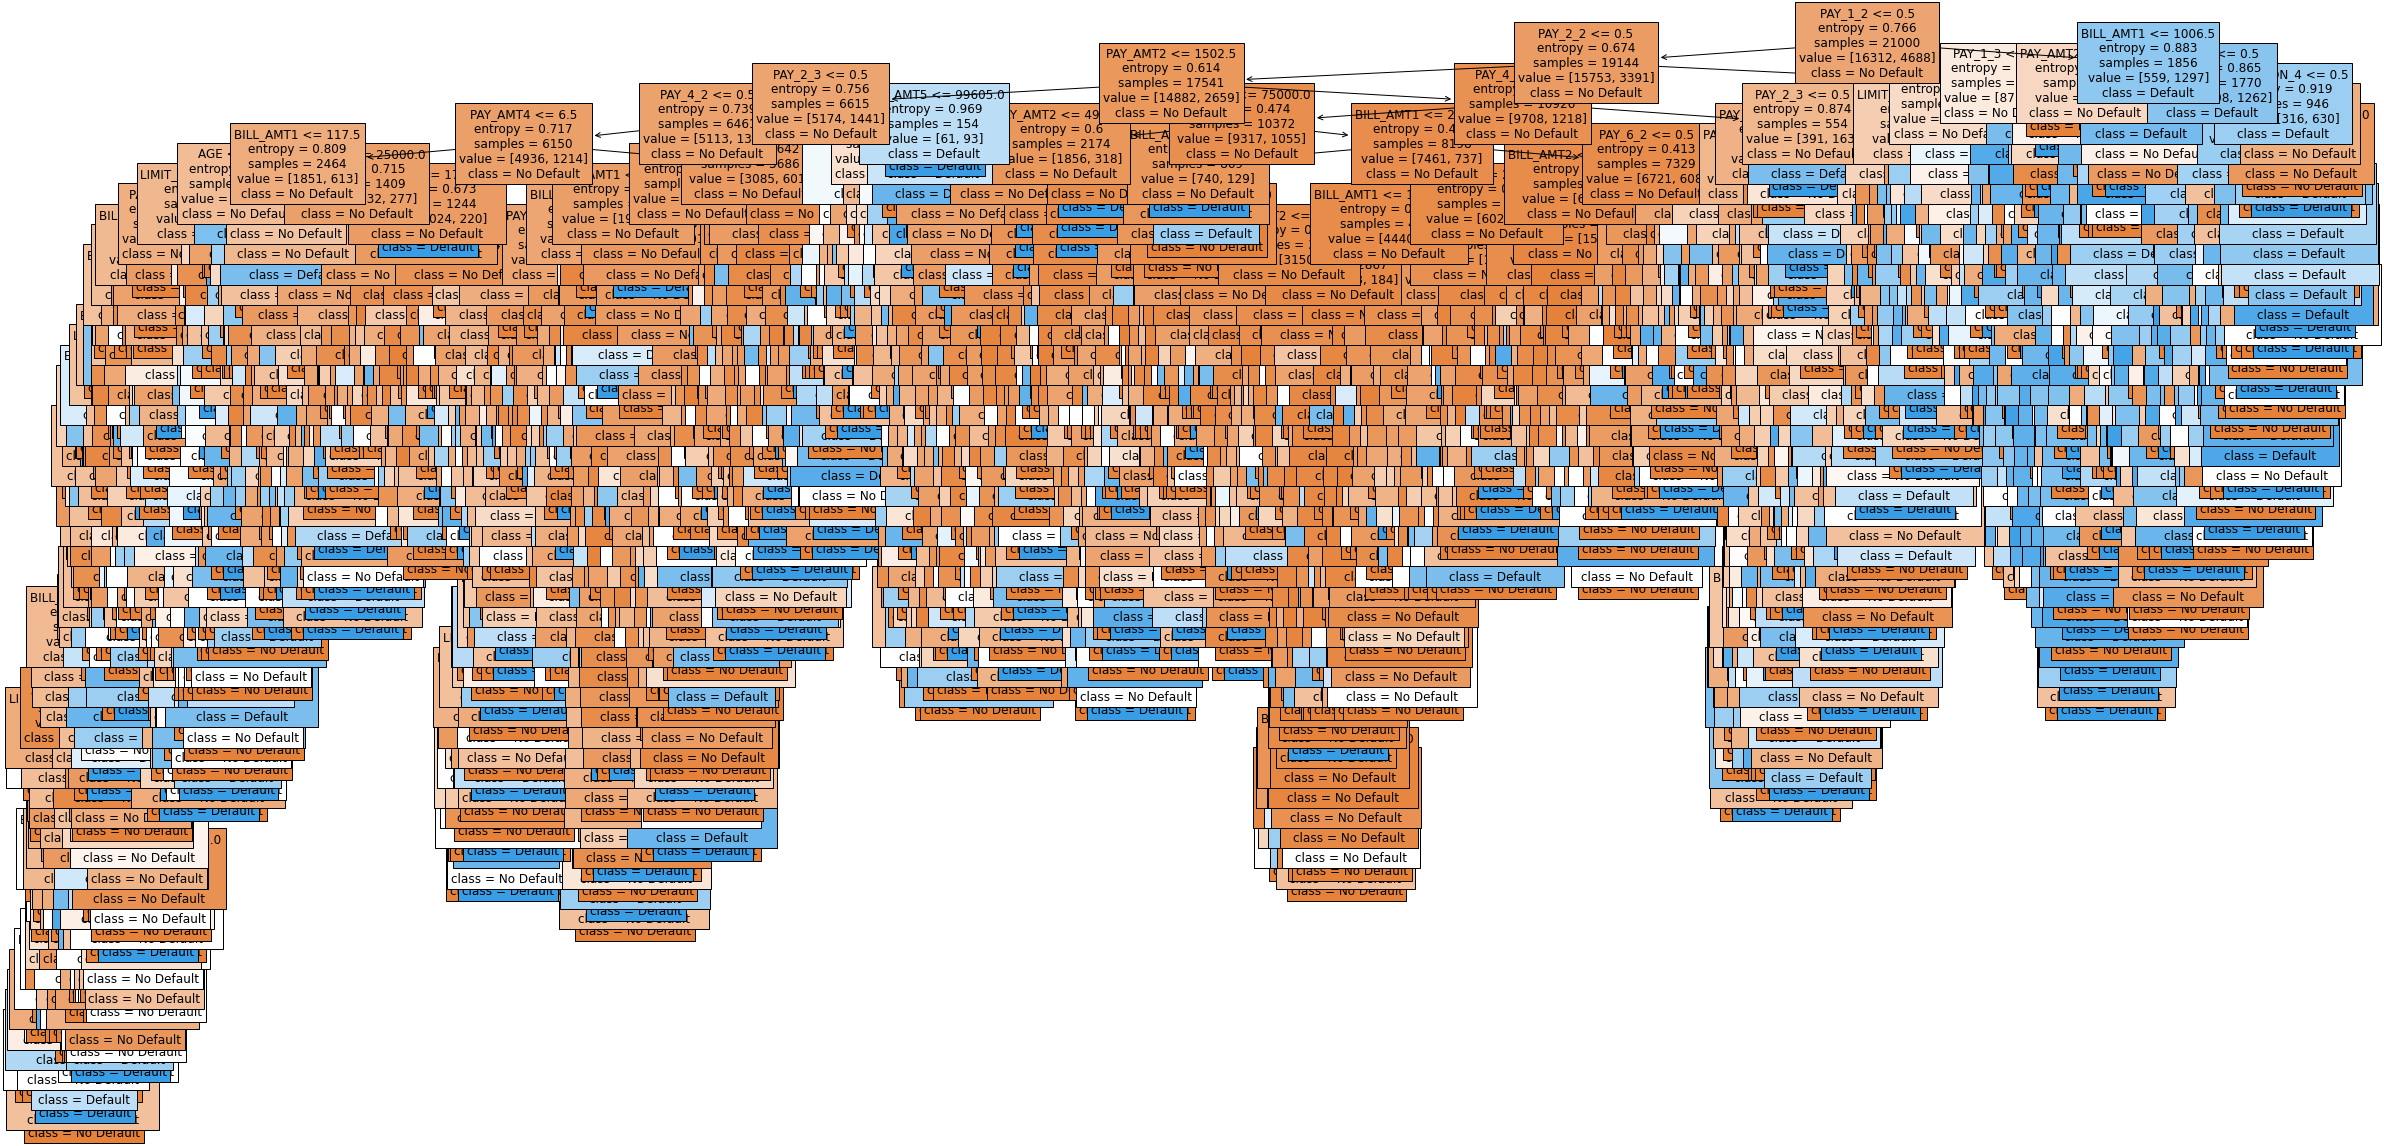

In [23]:
get_dt_graph(tree_clf2)

In [24]:
y_test_pred = tree_clf2.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7258888888888889


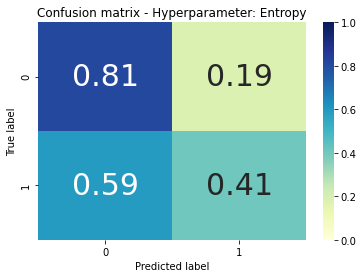

In [25]:
cm_tree = confusion_matrix(y_test, tree_clf2.predict(X_test))
cm_norm_tree = cm_tree / cm_tree.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_tree, classes = tree_clf2.classes_, title='Confusion matrix - Hyperparameter: Entropy')

In [26]:
tree_clf3 = DecisionTreeClassifier(random_state=123,criterion='gini')
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

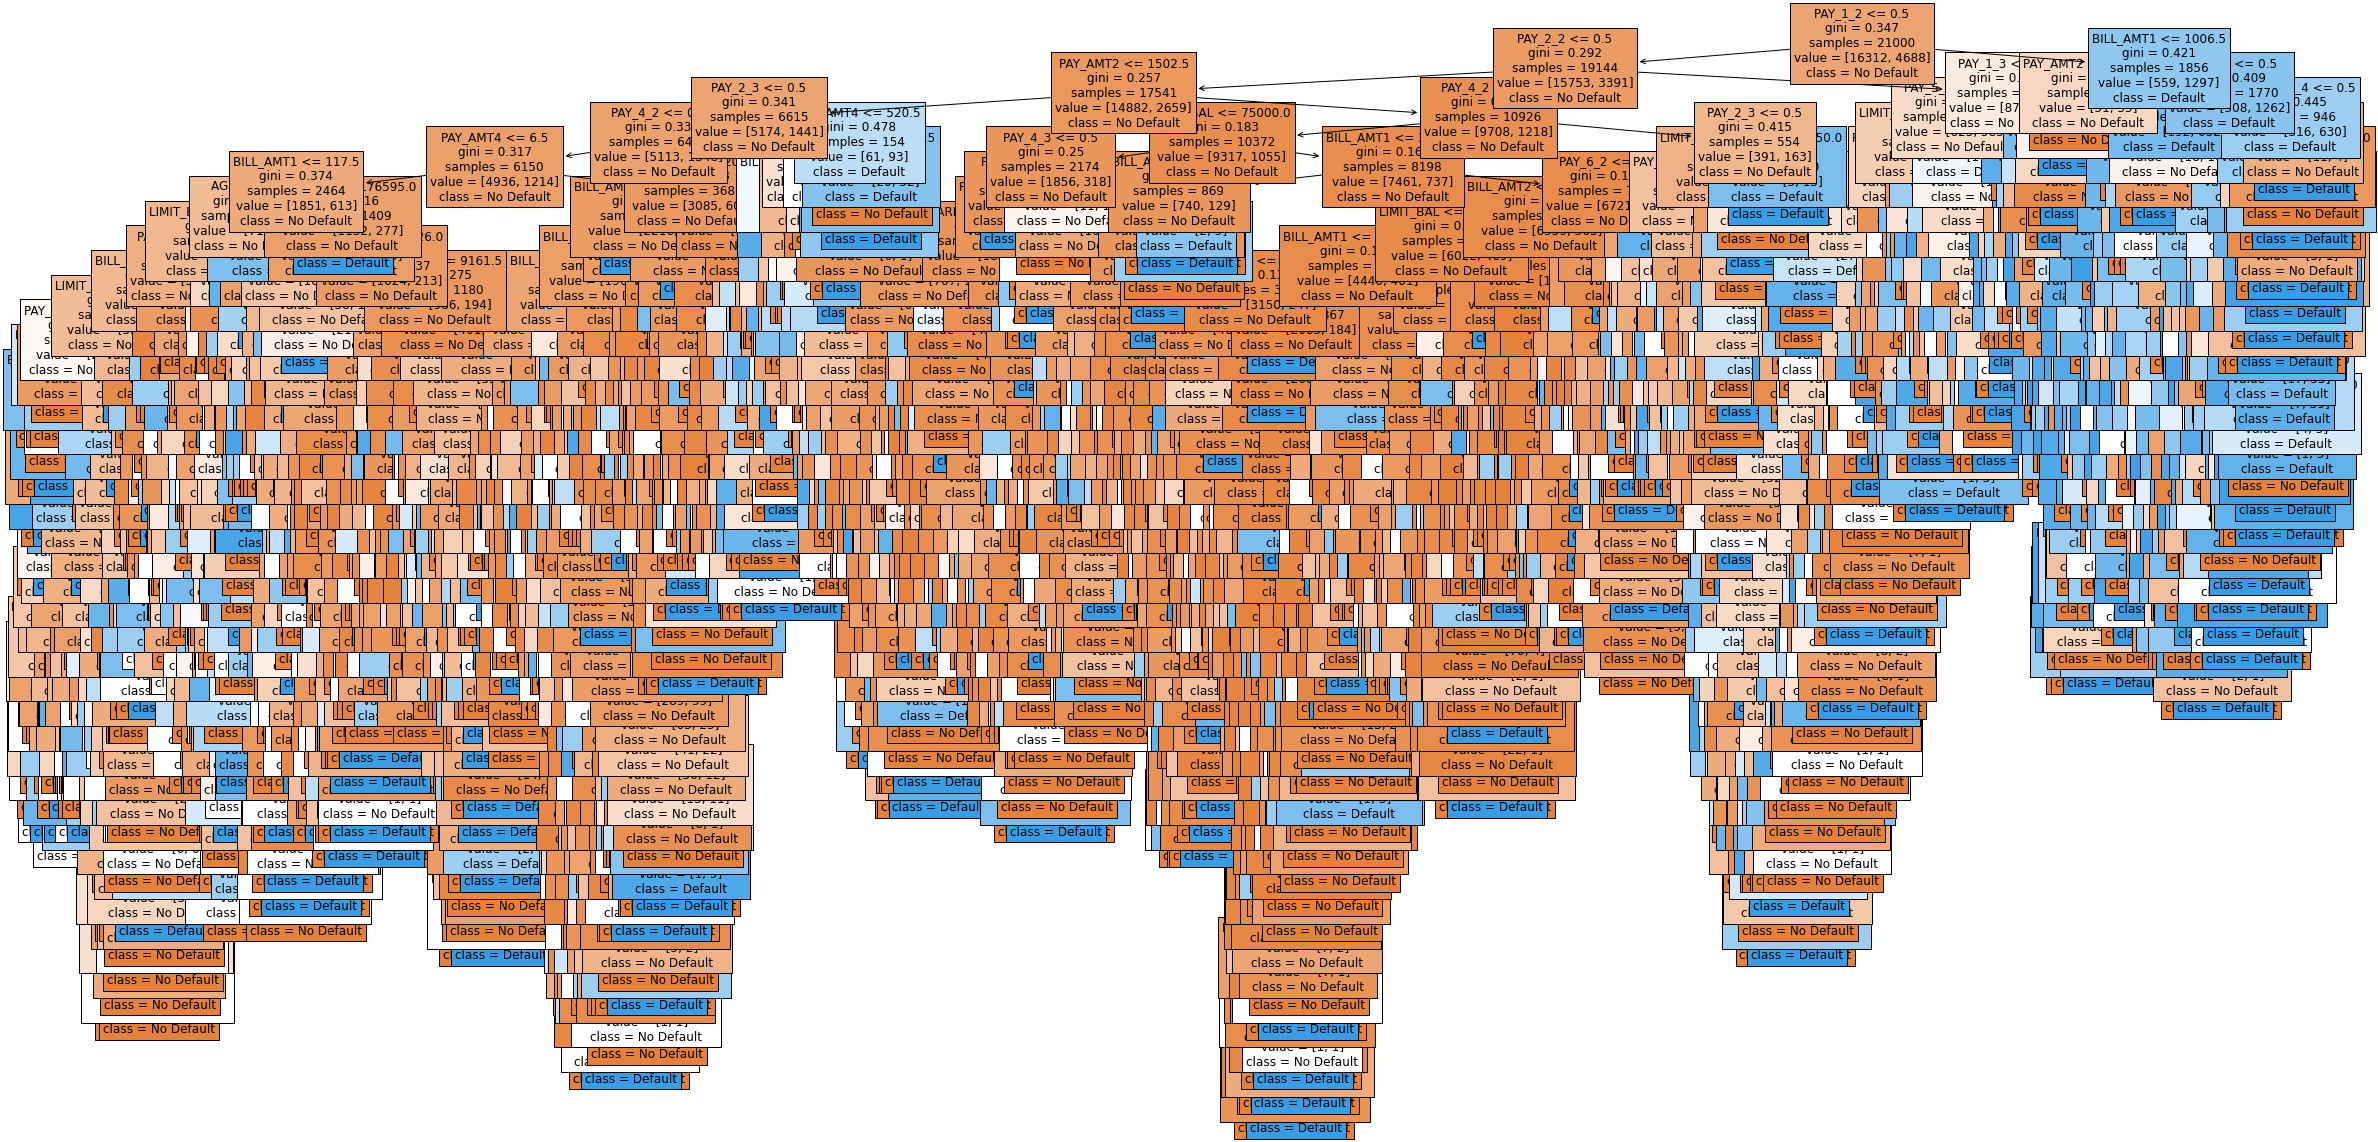

In [27]:
get_dt_graph(tree_clf3)

In [28]:
y_test_pred = tree_clf3.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7238888888888889


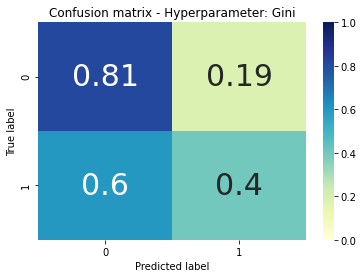

In [29]:
cm_tree = confusion_matrix(y_test, tree_clf3.predict(X_test))
cm_norm_tree = cm_tree / cm_tree.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_tree, classes = tree_clf3.classes_, title='Confusion matrix - Hyperparameter: Gini')

## Analysis

We observe that having no hyperparameters defined when using the Decision Tree classifier, we obtain a very complex decision tree with an accuracy of only 72%. Morever, from the confusion matrix we can observe that the Type I error (false positive) is 0.19, meaning that 19% of the clients in the test dataset were predicted as default payment when in fact they wouldn't.

When tuning the classifier with the hyperparameters, we observed that neither fixing the criterion to entropy or gini alone had a significant change in the complexity of the desition tree nor the accuracy of the model, both classifiers had also an accuracy of 72% with similar values in the confusion matrix. 

Nevertheless, when tuning the hyperparameter: max_depth, we can observe that the desition tree becomes significantly less complex and the accuracy of the model increases to 82%. Also, we observe in the confusion matrix that both, the Type 1 has a significant lower value of 4%, meaning that the model was more carefully at wrongly predicting the default of a client.

Lastly, we will do a final hyperparameter evaluation using max_depth and criterion entropy together to observe any effect on the accuracy of the model

In [30]:
tree_clf4 = DecisionTreeClassifier(random_state=123, max_depth=5, criterion='entropy')
tree_clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

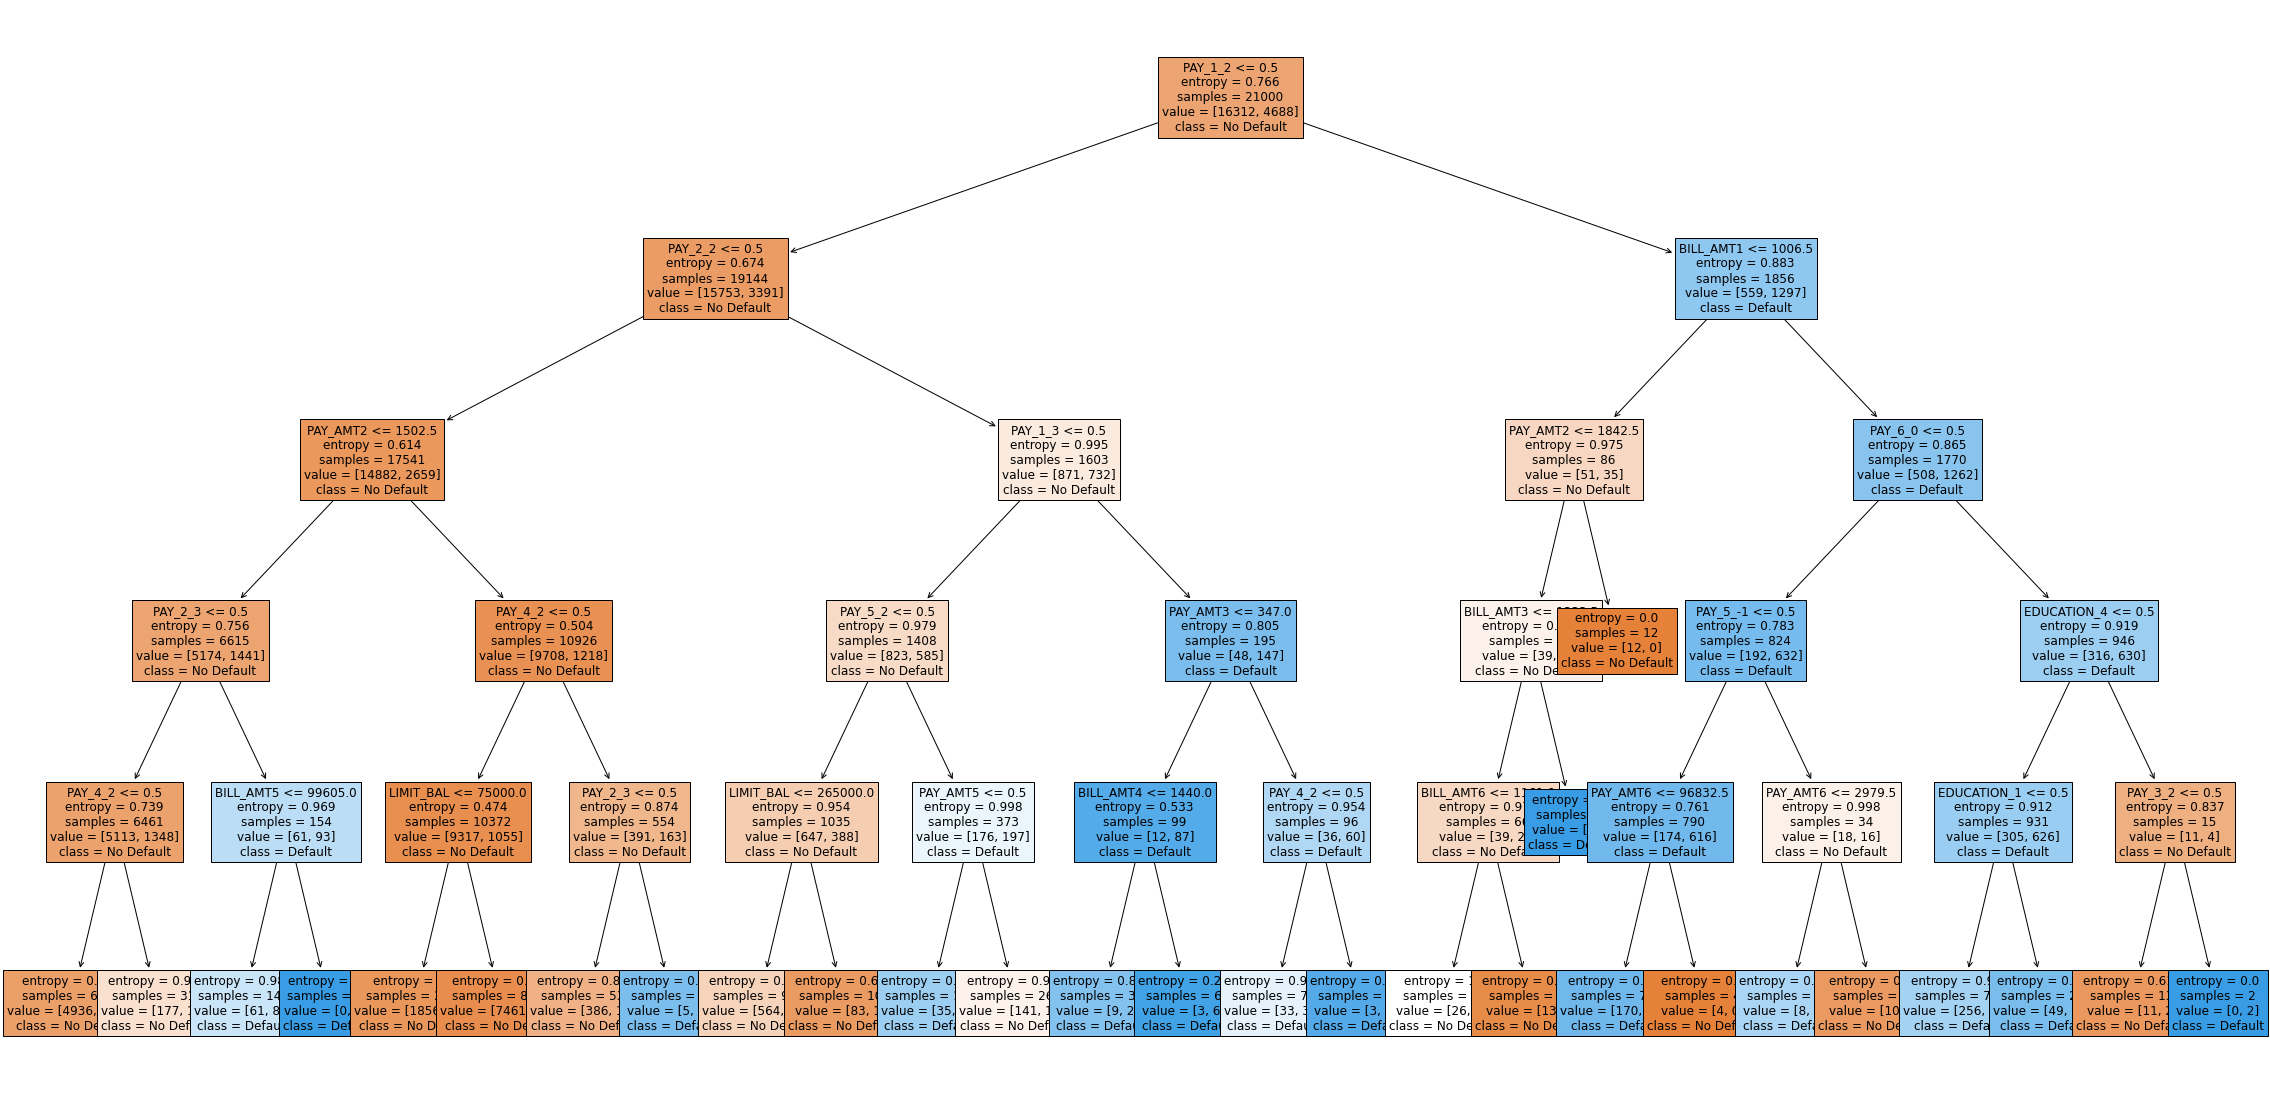

In [31]:
get_dt_graph(tree_clf4)

In [32]:
y_test_pred = tree_clf4.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8215555555555556


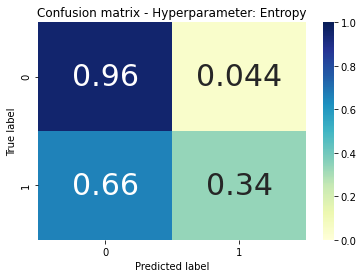

In [33]:
cm_tree = confusion_matrix(y_test, tree_clf4.predict(X_test))
cm_norm_tree = cm_tree / cm_tree.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_tree, classes = tree_clf4.classes_, title='Confusion matrix - Hyperparameter: Entropy')

With the last model we observe that the accuracy increases stligthly and the confusion matrix has similar values as model 1 when we tunned max_depth

#### Building a decision tree but this time using RandomizedSearchCV over hyper-parameters.

In [34]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import random

In [35]:
clf = DecisionTreeClassifier()
parameters = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}

In [36]:
tree_cv = RandomizedSearchCV(clf, parameters, cv=5)
tree_cv.fit(X_train,y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", tree_cv.best_estimator_)
print("\n The best score across ALL searched params:\n", tree_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", tree_cv.best_params_)

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=3)

 The best score across ALL searched params:
 0.8167142857142856

 The best parameters across ALL searched params:
 {'max_depth': 3, 'criterion': 'gini'}


In [37]:
tree_clf5 = DecisionTreeClassifier(random_state=123, max_depth=3, criterion='gini')
tree_clf5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [38]:
y_test_pred = tree_clf5.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8201111111111111


We observe that indeed, tuning the parameters selected by Rando Search has given the best accuracy so far

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [39]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import learning_curve

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8166666666666667


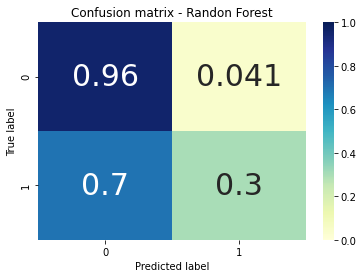

In [41]:
cm_RF = confusion_matrix(y_test, rnd_clf.predict(X_test))
cm_norm_RF = cm_RF / cm_RF.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_RF, classes = rnd_clf.classes_, title='Confusion matrix - Randon Forest')

In [42]:
train_sizes, train_scores, test_scores = learning_curve(rnd_clf, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

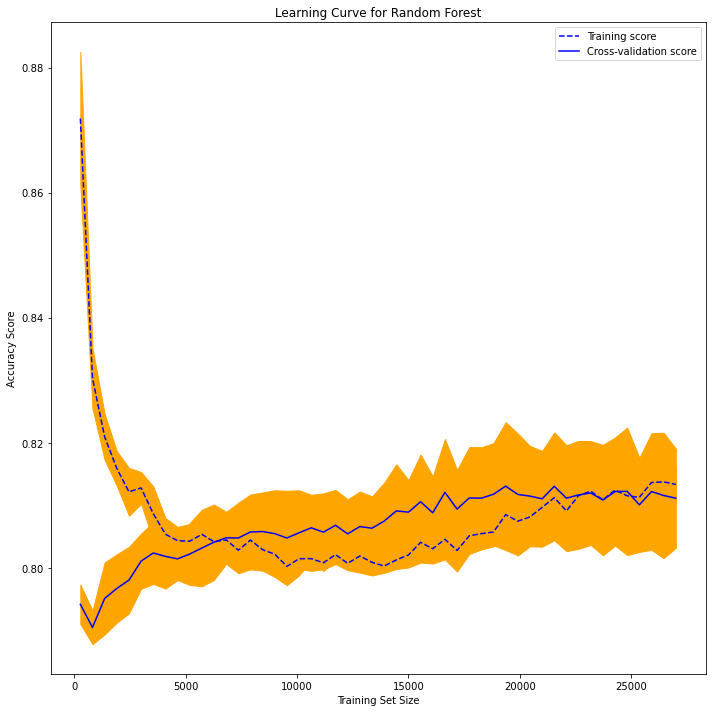

In [43]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange')

plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8178888888888889


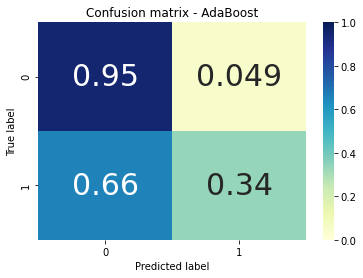

In [46]:
cm_ADA = confusion_matrix(y_test, ada_clf.predict(X_test))
cm_norm_ADA = cm_ADA / cm_ADA.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_ADA, classes = ada_clf.classes_, title='Confusion matrix - AdaBoost')

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
forest = ExtraTreesClassifier(n_estimators=5)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7858888888888889


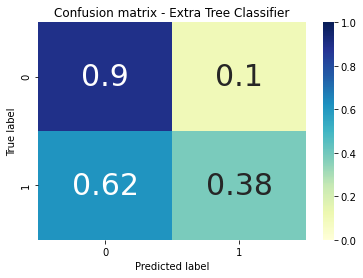

In [49]:
cm_ET = confusion_matrix(y_test, forest.predict(X_test))
cm_norm_ET = cm_ET / cm_ET.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_ET, classes = forest.classes_, title='Confusion matrix - Extra Tree Classifier')

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7967777777777778


In [52]:
train_sizes, train_scores, test_scores = learning_curve(gb_clf, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

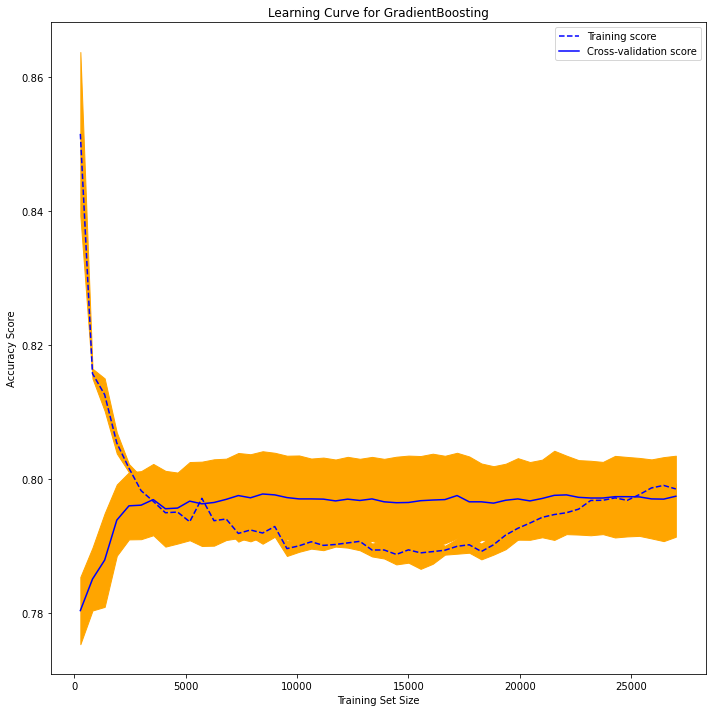

In [55]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange')

plt.title("Learning Curve for GradientBoosting")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()


plt.show()

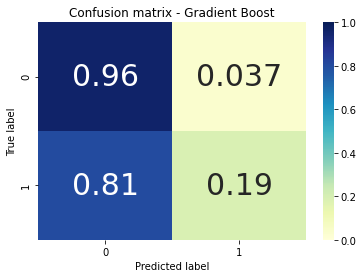

In [54]:
cm_GB = confusion_matrix(y_test, gb_clf.predict(X_test))
cm_norm_GB = cm_GB / cm_GB.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_GB, classes = gb_clf.classes_, title='Confusion matrix - Gradient Boost')

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

#### How does changing hyperparms effect model performance? 

By changing the hyperparameters of our classifier we have directly control on the behaviour of the training model. Hyperparameters help estimating the parameters of the model being used, whcih will make the model more suittable to the dataset. 

#### Why do you think certain models performed better/worse?

- Each of the models we tested in this code have their own built-in assumptions. When the assuptions and strengths of a model fit the data we are currently testing, we can have a better performance of the model or even an overfit, but if the assuptions of the model do not match the data we can get a bad fit. 
- We didnt do a step of Features selection, thus, we might be fitting the model to some noise and spurious correlation. If we added this step to the process we might find that some of the models that didnt have a great accuracy will improve significantly when removing non-important variables.
- We observe that Random Forest had the best accuracy/performance of all the mdoels we tested and this could be due that this model is quite robust and works wellin regression problems and classfiers, but this kind of model wouldn't be as good for image classification for example.

####  How does this performance line up with known strengths/weakness of these models?

- We could observe that in general classification trees (Rando Forest, Gradient Boosted tree, Extra tree) perform very well. They are robust even and are able to easily model non-linear decision boundaries thanks to the hierarchical structure they are based on. We could also observe that the decision trees can get very complex if not tunned correctly lose performance.
- We observe that AdaBoost was one of the models with lower accuracy. This could be due that Adaboost can be affected by noisy data, outliers and imbalanced dataset which is our case from the EA we did in assigment 1.
- We can also observe that in general the ensembles had a better performance that the decision tree alone.
